## Testing for stationarity

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NGNUSD = pd.read_csv("C:/Users/USER/Downloads/NGNUSD.csv")
TNDUSD = pd.read_csv("C:/Users/USER/Downloads/TNDUSD.csv")
ZARUSD = pd.read_csv("C:/Users/USER/Downloads/ZARUSD.csv")
MADUSD = pd.read_csv("C:/Users/USER/Downloads/MADUSD.csv")
EGPUSD = pd.read_csv("C:/Users/USER/Downloads/EGPUSD.csv",encoding='ISO-8859-1')

In [3]:
EGPUSD


,DATE,EGYPTIAN £ TO US $ (WMR) - BID SPOT,EGYPTIAN £ TO US $ (WMR) - SPOT OFFERED,Spread,Returns,Market returns
0,2017-01-20,18.78,18.90,-0.12,0.000000,0.000271
1,2017-01-23,18.80,18.99,-0.19,0.001064,0.000271
2,2017-01-24,18.83,18.98,-0.15,0.001593,0.000271
3,2017-01-25,18.85,18.95,-0.10,0.001061,0.000270
4,2017-01-26,18.78,18.90,-0.12,-0.003727,0.000270
...,...,...,...,...,...,...
1561,2023-01-16,29.60,29.70,-0.10,0.003378,0.001950
1562,2023-01-17,29.53,29.63,-0.10,-0.002370,0.001593
1563,2023-01-18,29.60,29.70,-0.10,0.002365,0.002914
1564,2023-01-19,29.79,29.89,-0.10,0.006378,0.003189


In [4]:
ZARUSD = pd.read_csv("C:/Users/USER/Downloads/ZARUSD.csv", header=[0,0],index_col=[0])
NGNUSD = pd.read_csv("C:/Users/USER/Downloads/NGNUSD.csv", header=[0,0],index_col=[0])
TNDUSD = pd.read_csv("C:/Users/USER/Downloads/TNDUSD.csv", header=[0,0],index_col=[0])
MADUSD = pd.read_csv("C:/Users/USER/Downloads/MADUSD.csv", header=[0,0],index_col=[0])
EGPUSD = pd.read_csv("C:/Users/USER/Downloads/EGPUSD.csv",encoding='ISO-8859-1',header=[0,0],index_col=[0])

In [5]:
ZARUSD

DATE,SOUTH AFRICA RAND TO US $ (WMR) - BID SPOT,SOUTH AFRICA RAND TO US $ (WMR) - SPOT OFFERED,Spread,Returns,Market return
DATE,SOUTH AFRICA RAND TO US $ (WMR) - BID SPOT,SOUTH AFRICA RAND TO US $ (WMR) - SPOT OFFERED,Spread,Returns,Market return
2017-01-20,13.5635,13.5753,-0.0118,0.000000,0.000105
2017-01-23,13.5000,13.5100,-0.0100,-0.004704,0.000108
2017-01-24,13.3187,13.3288,-0.0101,-0.013612,0.000117
2017-01-25,13.2476,13.2587,-0.0111,-0.005367,0.000121
2017-01-26,13.3525,13.3625,-0.0100,0.007856,0.000116
...,...,...,...,...,...
2023-01-16,16.9640,16.9710,-0.0070,0.010298,0.002479
2023-01-17,17.0944,17.1019,-0.0075,0.007628,0.000762
2023-01-18,16.9558,16.9667,-0.0109,-0.008174,0.005230


In [6]:
TNDUSDclose=TNDUSD.loc[:,"TUNISIAN DINAR TO US $ (WMR) - BID SPOT"].copy()
ZARUSDclose=ZARUSD.loc[:,"SOUTH AFRICA RAND TO US $ (WMR) - BID SPOT"].copy()
NGNUSDclose=NGNUSD.loc[:,"NIGERIAN NAIRA TO US $ (WMR) - BID SPOT"].copy()
MADUSDclose=MADUSD.loc[:,"MOROCCAN DIRHAM TO US $ (WMR) - BID SPOT"].copy()
EGPUSDclose=EGPUSD.loc[:,"EGYPTIAN £ TO US $ (WMR) - BID SPOT"].copy()

In [7]:
TNDUSDclose.shift(periods=1)
ZARUSDclose.shift(periods=1)
NGNUSDclose.shift(periods=1)
MADUSDclose.shift(periods=1)
EGPUSDclose.shift(periods=1)

DATE,EGYPTIAN £ TO US $ (WMR) - BID SPOT
2017-01-20,NaN
2017-01-23,18.78
2017-01-24,18.80
2017-01-25,18.83
2017-01-26,18.85
...,...
2023-01-16,29.50
2023-01-17,29.60
2023-01-18,29.53
2023-01-19,29.60


## DIFFERENCIG THE DATA AND THEIR GRAPHS

In [8]:
TNDUSDclose['differenced'] = TNDUSDclose['TUNISIAN DINAR TO US $ (WMR) - BID SPOT'].diff(periods=1)
ZARUSDclose['differenced'] = ZARUSDclose['SOUTH AFRICA RAND TO US $ (WMR) - BID SPOT'].diff(periods=1)
NGNUSDclose['differenced'] = NGNUSDclose['NIGERIAN NAIRA TO US $ (WMR) - BID SPOT'].diff(periods=1)
MADUSDclose['differenced'] = MADUSDclose['MOROCCAN DIRHAM TO US $ (WMR) - BID SPOT'].diff(periods=1)
EGPUSDclose['differenced'] = EGPUSDclose['EGYPTIAN £ TO US $ (WMR) - BID SPOT'].diff(periods=1)

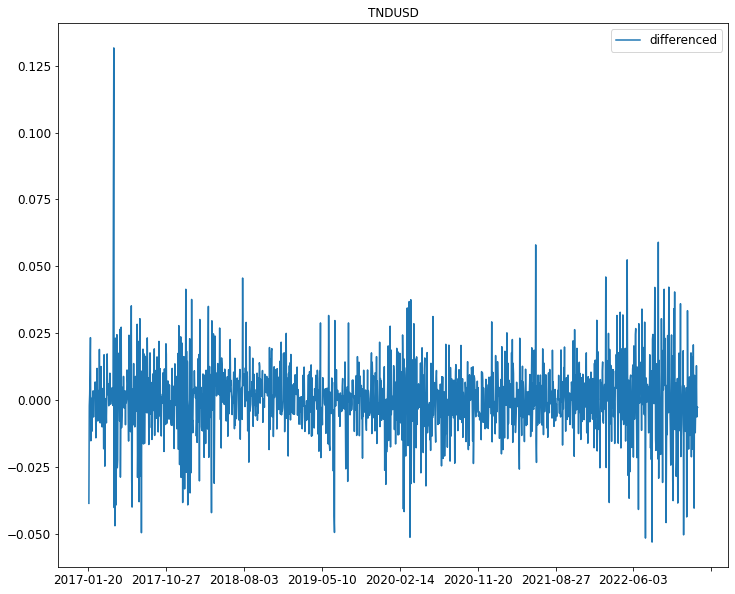

In [9]:
TNDUSDclose.differenced.plot(figsize=(12,10),title=("TNDUSD"),fontsize=12)
plt.legend(fontsize=12)
plt.show()

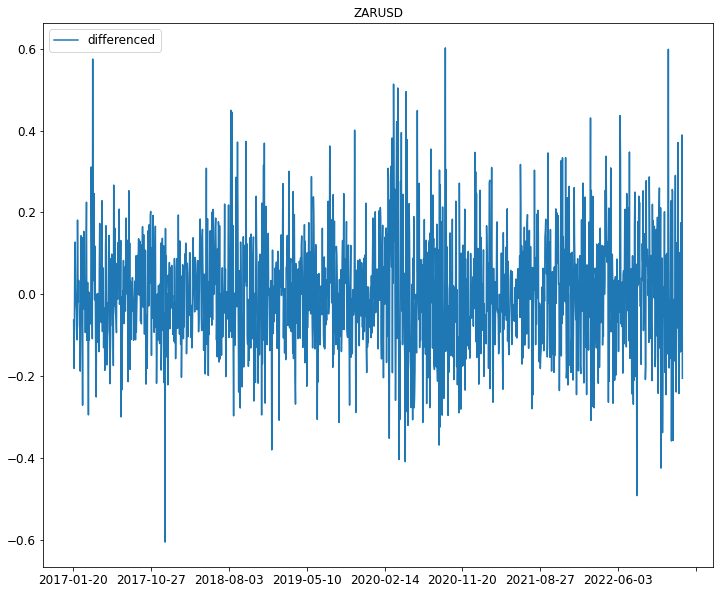

In [10]:
ZARUSDclose.differenced.plot(figsize=(12,10),title=("ZARUSD"),fontsize=12)
plt.legend(fontsize=12)
plt.show()

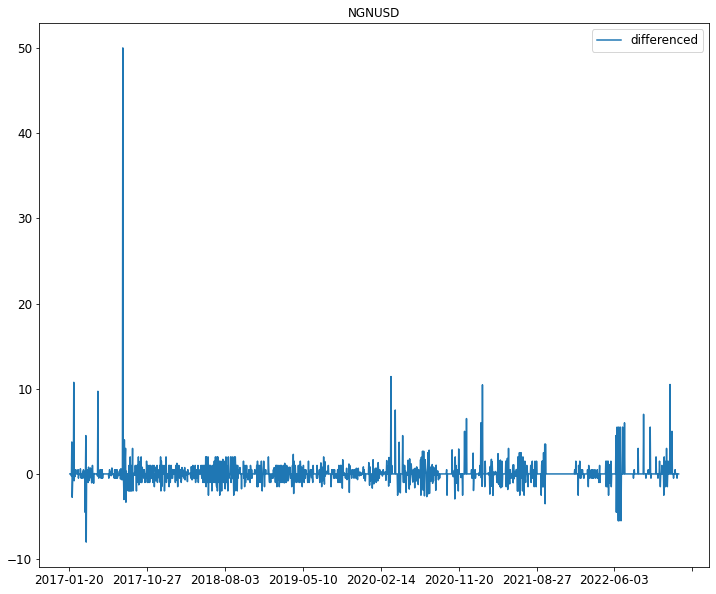

In [11]:
NGNUSDclose.differenced.plot(figsize=(12,10),title=("NGNUSD"),fontsize=12)
plt.legend(fontsize=12)
plt.show()

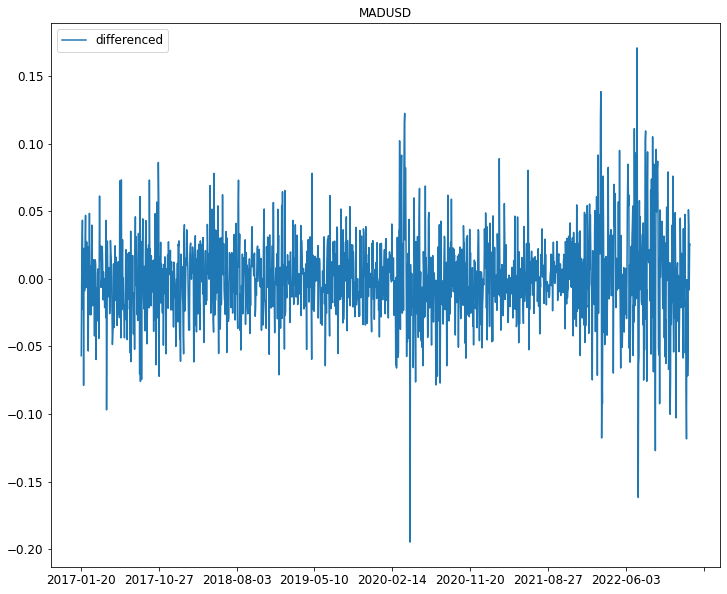

In [12]:
MADUSDclose.differenced.plot(figsize=(12,10),title=("MADUSD"),fontsize=12)
plt.legend(fontsize=12)
plt.show()

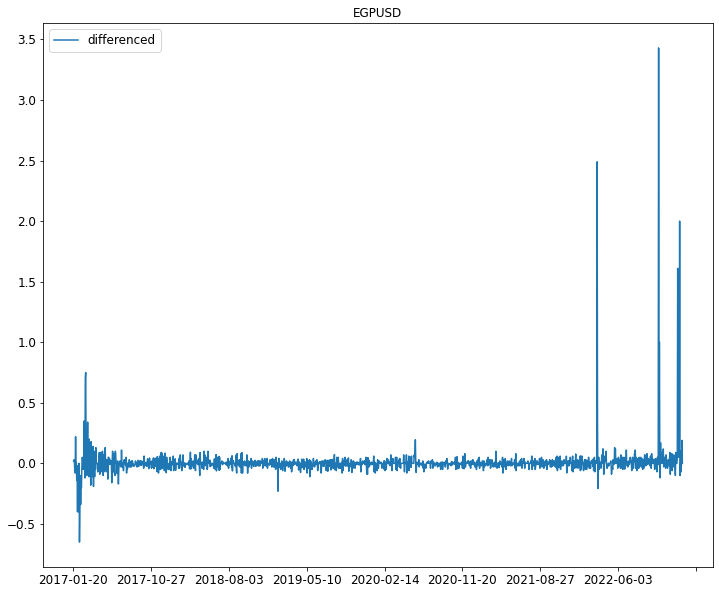

In [13]:
EGPUSDclose.differenced.plot(figsize=(12,10),title=("EGPUSD"),fontsize=12)
plt.legend(fontsize=12)
plt.show()

## Market model for ZAR

In [14]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('C:/Users/USER/Downloads/ZARUSD.csv')

# Convert the column 'value' from string to float
data['Returns'] = data['Returns'].astype(float)
data['mean return'] = data['Market return'].astype(float)
# Save the dataframe to a new CSV file
data.to_csv('ZARUSDconverted_data.csv', index=False)

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

# load data
data = pd.read_csv('C:/Users/USER/Downloads/ZARUSD.csv')

# specify event window
event_start = '2020-02-11'
event_end = '2021-03-12'

# calculate abnormal returns for event window
data['abnormal_returns'] = data['Returns'] - data['Market return']
event_window = (data['DATE'] >= event_start) & (data['DATE'] <= event_end)
event_data = data[event_window]




In [16]:
# calculate market model parameters
x = event_data['Market return']
y = event_data['abnormal_returns']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# print results
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')

Slope: -7.187398208196614
Intercept: 0.00020940975610730765
R-squared: 0.007642555185605888


## MARKET MODEL FOR NGN

In [17]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('C:/Users/USER/Downloads/NGNUSD.csv')

# Convert the column 'value' from string to float
data['Returns'] = data['Returns'].astype(float)
data['mean return'] = data['Market returns'].astype(float)
# Save the dataframe to a new CSV file
data.to_csv('NGNUSDconverted_data.csv', index=False)

import numpy as np
from scipy.stats import linregress

# load data
data = pd.read_csv('C:/Users/USER/Downloads/NGNUSD.csv')

# specify event window
event_start = '2018-01-01'
event_end = '2019-01-01'

# calculate abnormal returns for event window
data['abnormal_returns'] = data['Returns'] - data['Market returns']
event_window = (data['DATE'] >= event_start) & (data['DATE'] <= event_end)
event_data = data[event_window]

# calculate market model parameters
x = event_data['Market returns']
y = event_data['abnormal_returns']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# print results
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')

Slope: 25.80461846416335
Intercept: -0.005320397319770738
R-squared: 0.01059718959246103


## Market Model for EGPUSD

In [18]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("C:/Users/USER/Downloads/EGPUSD.csv",encoding='ISO-8859-1')

# Convert the column 'value' from string to float
data['Returns'] = data['Returns'].astype(float)
data['mean return'] = data['Market returns'].astype(float)
# Save the dataframe to a new CSV file
data.to_csv('EGPUSDconverted_data.csv', index=False)

import numpy as np
from scipy.stats import linregress

# load data
data = pd.read_csv("C:/Users/USER/Downloads/EGPUSD.csv",encoding='ISO-8859-1')

# specify event window
event_start = '2020-01-21'
event_end = '2021-02-20'

# calculate abnormal returns for event window
data['abnormal_returns'] = data['Returns'] - data['Market returns']
event_window = (data['DATE'] >= event_start) & (data['DATE'] <= event_end)
event_data = data[event_window]

# calculate market model parameters
x = event_data['Market returns']
y = event_data['abnormal_returns']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# print results
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')

Slope: -1.3622985560117942
Intercept: 0.0003178685298284355
R-squared: 0.009618037539818552


## Market model for TNDUSD

In [19]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("C:/Users/USER/Downloads/TNDUSD.csv")

# Convert the column 'value' from string to float
data['Returns'] = data['Returns'].astype(float)
data['mean return'] = data['Market returns'].astype(float)
# Save the dataframe to a new CSV file
data.to_csv('TNDUSDconverted_data.csv', index=False)

import numpy as np
from scipy.stats import linregress

# load data
data = pd.read_csv("C:/Users/USER/Downloads/TNDUSD.csv")

# specify event window
event_start = '2020-02-01'
event_end = '2021-03-02'

# calculate abnormal returns for event window
data['abnormal_returns'] = data['Returns'] - data['Market returns']
event_window = (data['DATE'] >= event_start) & (data['DATE'] <= event_end)
event_data = data[event_window]

# calculate market model parameters
x = event_data['Market returns']
y = event_data['abnormal_returns']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# print results
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')

Slope: 3.29125953674545
Intercept: -0.0007474789286526253
R-squared: 0.0018633859936324478


## Market model for MADUSD

In [20]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("C:/Users/USER/Downloads/MADUSD.csv")

# Convert the column 'value' from string to float
data['Returns'] = data['Returns'].astype(float)
data['mean return'] = data['Market returns'].astype(float)
# Save the dataframe to a new CSV file
data.to_csv('MADUSDconverted_data.csv', index=False)

import numpy as np
from scipy.stats import linregress

# load data
data = pd.read_csv("C:/Users/USER/Downloads/MADUSD.csv")

# specify event window
event_start = '2020-02-01'
event_end = '2021-03-02'

# calculate abnormal returns for event window
data['abnormal_returns'] = data['Returns'] - data['Market returns']
event_window = (data['DATE'] >= event_start) & (data['DATE'] <= event_end)
event_data = data[event_window]

# calculate market model parameters
x = event_data['Market returns']
y = event_data['abnormal_returns']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# print results
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')

Slope: -0.44122825870305665
Intercept: -0.00033963279234336353
R-squared: 0.00010023797250022217


## plot for MADUSD spread

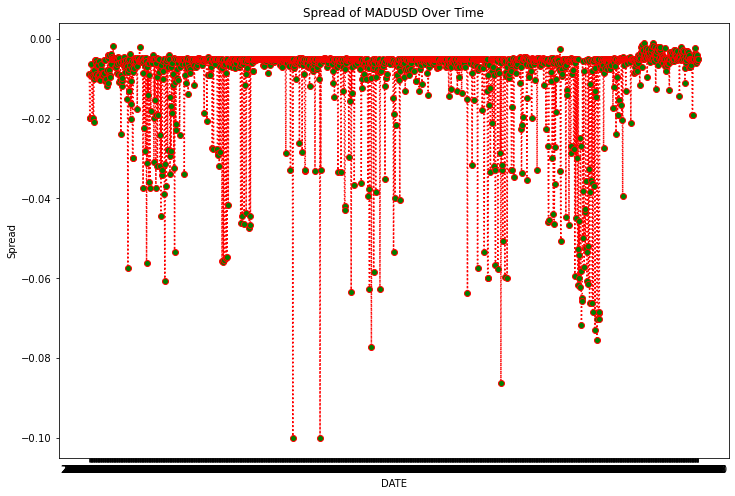

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('MADUSDconverted_data.csv')
plt.figure(figsize=(12, 8))
# Plot the spread of the currency over time
plt.plot(data['DATE'], data['Spread'], color='red', marker='o',markerfacecolor='green', linestyle='dotted')
plt.xlabel('DATE')
plt.ylabel('Spread')
plt.title('Spread of MADUSD Over Time')
plt.show()


## CUMMULATIVE ABNORMAL RETURNS FOR MADUSD

In [22]:
import pandas as pd

# Load data into a dataframe
data = pd.read_csv('MADUSDconverted_data.csv')

# Calculate the expected return using the market return
data['expected_return'] = data['Market returns']

# Calculate the abnormal return
data['abnormal_return'] = data['Returns'] - data['expected_return']

# Calculate the cumulative abnormal return
event_day = '2020-03-03'
before_event = data[data['DATE'] < event_day]
after_event = data[data['DATE'] >= event_day]

car_before_event = before_event['abnormal_return'].sum()
car_after_event = after_event['abnormal_return'].sum()

print('Cumulative abnormal return before event:', car_before_event)
print('Cumulative abnormal return after event:', car_after_event)

Cumulative abnormal return before event: 0.9030453630489997
Cumulative abnormal return after event: 0.012925157679999993


## PLOT FOR TNDUSD

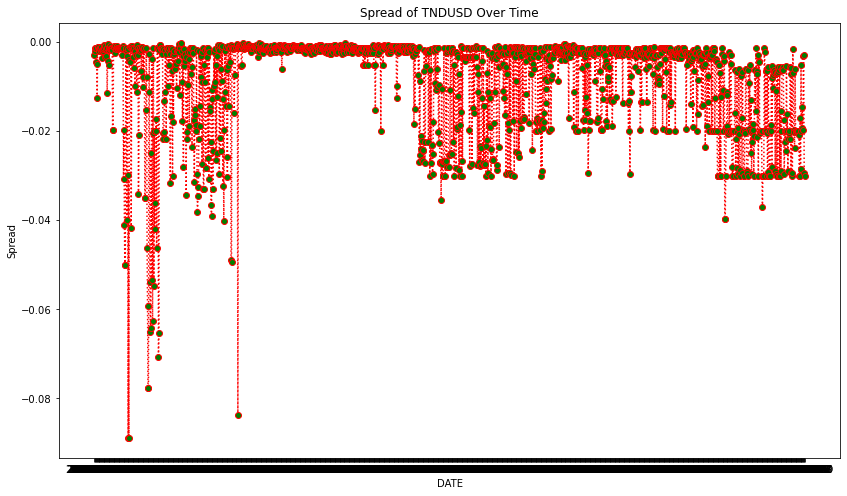

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('TNDUSDconverted_data.csv')
plt.figure(figsize=(14, 8))
# Plot the spread of the currency over time
plt.plot(data['DATE'], data['Spread'], color='red', marker='o',markerfacecolor='green', linestyle='dotted')
plt.xlabel('DATE')
plt.ylabel('Spread')
plt.title('Spread of TNDUSD Over Time')
plt.show()

## CUMM ABNORMAL RETURNS FOR TNDUSD

In [24]:
import pandas as pd

# Load data into a dataframe
data = pd.read_csv('TNDUSDconverted_data.csv')

# Calculate the expected return using the market return
data['expected_return'] = data['Market returns']

# Calculate the abnormal return
data['abnormal_return'] = data['Returns'] - data['expected_return']

# Calculate the cumulative abnormal return
event_day = '2020-03-03'
before_event = data[data['DATE'] < event_day]
after_event = data[data['DATE'] >= event_day]

car_before_event = before_event['abnormal_return'].sum()
car_after_event = after_event['abnormal_return'].sum()

print('Cumulative abnormal return before event:', car_before_event)
print('Cumulative abnormal return after event:', car_after_event)

Cumulative abnormal return before event: 0.1039479054527
Cumulative abnormal return after event: 0.08404077255000002


## PLOT FOR EGPUSD

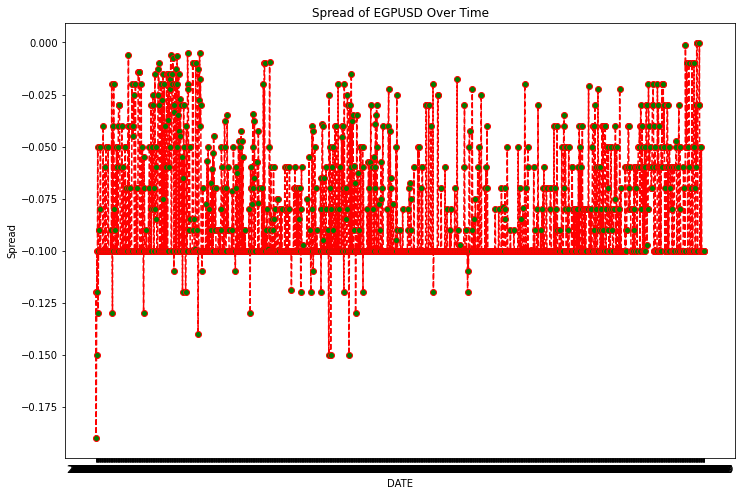

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('EGPUSDconverted_data.csv')
plt.figure(figsize=(12, 8))
# Plot the spread of the currency over time
plt.plot(data['DATE'], data['Spread'], color='red', marker='o',markerfacecolor='green', linestyle='dashed')
plt.xlabel('DATE')
plt.ylabel('Spread')
plt.title('Spread of EGPUSD Over Time')
plt.show()

## cumm abnormal returns for EGPUSD

In [39]:
import pandas as pd

# Load data into a dataframe
data = pd.read_csv('EGPUSDconverted_data.csv')

# Calculate the expected return using the market return
data['expected_return'] = data['Market returns']

# Calculate the abnormal return
data['abnormal_return'] = data['Returns'] - data['expected_return']

# Calculate the cumulative abnormal return
event_day = '2020-02-20'
before_event = data[data['DATE'] < event_day]
after_event = data[data['DATE'] >= event_day]

car_before_event = before_event['abnormal_return'].sum()
car_after_event = after_event['abnormal_return'].sum()

print('Cumulative abnormal return before event:', car_before_event)
print('Cumulative abnormal return after event:', car_after_event)

Cumulative abnormal return before event: -0.5669683750000001
Cumulative abnormal return after event: -1.04528117


## PLOT FOR NGNUSD

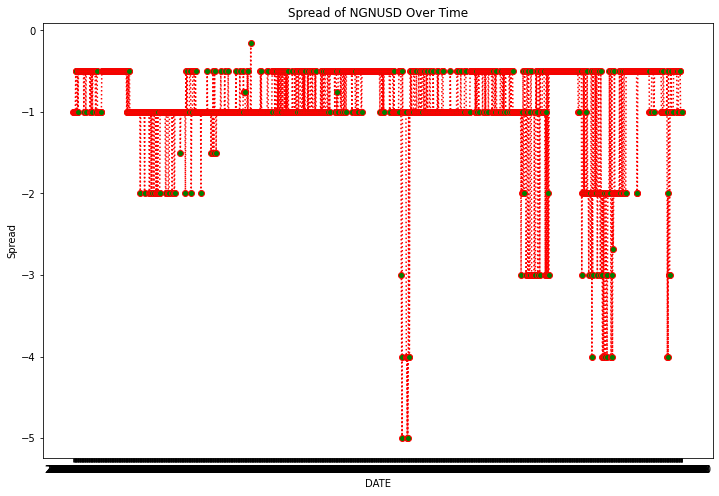

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('NGNUSDconverted_data.csv')
plt.figure(figsize=(12, 8))
# Plot the spread of the currency over time
plt.plot(data['DATE'], data['Spread'], color='red', marker='o',markerfacecolor='green', linestyle='dotted')
plt.xlabel('DATE')
plt.ylabel('Spread')
plt.title('Spread of NGNUSD Over Time')
plt.show()

## CUMM ABNORMAL RETURNS FOR NGNUSD

In [28]:
import pandas as pd

# Load data into a dataframe
data = pd.read_csv('NGNUSDconverted_data.csv')

# Calculate the expected return using the market return
data['expected_return'] = data['Market returns']

# Calculate the abnormal return
data['abnormal_return'] = data['Returns'] - data['expected_return']

# Calculate the cumulative abnormal return
event_day = '2020-03-28'
before_event = data[data['DATE'] < event_day]
after_event = data[data['DATE'] >= event_day]

car_before_event = before_event['abnormal_return'].sum()
car_after_event = after_event['abnormal_return'].sum()

print('Cumulative abnormal return before event:', car_before_event)
print('Cumulative abnormal return after event:', car_after_event)

Cumulative abnormal return before event: 1.0181404699999999
Cumulative abnormal return after event: -0.10408110479999999


## PLOT FOR ZARUSD SPREADS

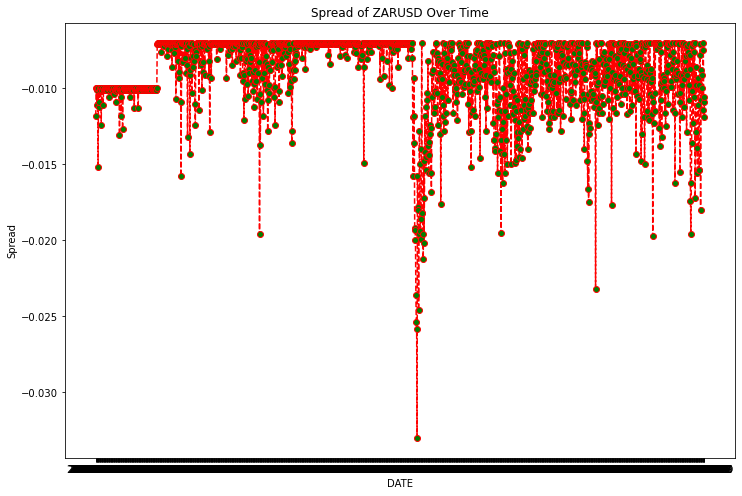

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('ZARUSDconverted_data.csv')
plt.figure(figsize=(12, 8))
# Plot the spread of the currency over time
plt.plot(data['DATE'], data['Spread'], color='red', marker='o',markerfacecolor='green', linestyle='dashed')
plt.xlabel('DATE')
plt.ylabel('Spread')
plt.title('Spread of ZARUSD Over Time')
plt.show()

## CUMM abnormal returns for ZARUSD

In [30]:
import pandas as pd

# Load data into a dataframe
data = pd.read_csv('NGNUSDconverted_data.csv')

# Calculate the expected return using the market return
data['expected_return'] = data['Market returns']

# Calculate the abnormal return
data['abnormal_return'] = data['Returns'] - data['expected_return']

# Calculate the cumulative abnormal return
event_day = '2020-03-28'
before_event = data[data['DATE'] < event_day]
after_event = data[data['DATE'] >= event_day]

car_before_event = before_event['abnormal_return'].sum()
car_after_event = after_event['abnormal_return'].sum()

print('Cumulative abnormal return before event:', car_before_event)
print('Cumulative abnormal return after event:', car_after_event)

Cumulative abnormal return before event: 1.0181404699999999
Cumulative abnormal return after event: -0.10408110479999999


## TEST STATISTIC FOR NGNUSD

In [31]:
import pandas as pd

# Load data into a dataframe
data = pd.read_csv('NGNUSDconverted_data.csv')

# Calculate the expected return using the market return
data['expected_return'] = data['Market returns']

# Calculate the abnormal return
data['abnormal_return'] = data['Returns'] - data['expected_return']

# Calculate the cumulative abnormal return
event_day = '2020-03-28'
before_event = data[data['DATE'] < event_day]
after_event = data[data['DATE'] >= event_day]

from scipy import stats

t_stat, p_value = stats.ttest_ind(before_event['abnormal_return'], after_event['abnormal_return'])

print('T-statistic:', t_stat)
print('P-value:', p_value)


T-statistic: 1.0508420657455348
P-value: 0.2934934706279012


## TEST STATISTIC FOR TNDUSD

In [32]:
import pandas as pd

# Load data into a dataframe
data = pd.read_csv('TNDUSDconverted_data.csv')

# Calculate the expected return using the market return
data['expected_return'] = data['Market returns']

# Calculate the abnormal return
data['abnormal_return'] = data['Returns'] - data['expected_return']

# Calculate the cumulative abnormal return
event_day = '2020-03-03'
before_event = data[data['DATE'] < event_day]
after_event = data[data['DATE'] >= event_day]

from scipy import stats

t_stat, p_value = stats.ttest_ind(before_event['abnormal_return'], after_event['abnormal_return'])

print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: 0.0656629503527993
P-value: 0.9476545619760686


## TEST STATISTIC FOR MADUSD

In [33]:
import pandas as pd

# Load data into a dataframe
data = pd.read_csv('MADUSDconverted_data.csv')

# Calculate the expected return using the market return
data['expected_return'] = data['Market returns']

# Calculate the abnormal return
data['abnormal_return'] = data['Returns'] - data['expected_return']

# Calculate the cumulative abnormal return
event_day = '2020-03-03'
before_event = data[data['DATE'] < event_day]
after_event = data[data['DATE'] >= event_day]

from scipy import stats

t_stat, p_value = stats.ttest_ind(before_event['abnormal_return'], after_event['abnormal_return'])

print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: 0.8501556632176885
P-value: 0.3953686727015929


## TEST STATISTIC FOR ZARUSD

In [35]:
import pandas as pd

# Load data into a dataframe
data = pd.read_csv('ZARUSDconverted_data.csv')

# Calculate the expected return using the market return
data['expected_return'] = data['Market return']

# Calculate the abnormal return
data['abnormal_return'] = data['Returns'] - data['expected_return']

# Calculate the cumulative abnormal return
event_day = '2020-03-28'
before_event = data[data['DATE'] < event_day]
after_event = data[data['DATE'] >= event_day]

from scipy import stats

t_stat, p_value = stats.ttest_ind(before_event['abnormal_return'], after_event['abnormal_return'])

print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: 0.7544924433040385
P-value: 0.4506671670138376


## TEST STATISTIC FOR EGPUSD

In [37]:
import pandas as pd

# Load data into a dataframe
data = pd.read_csv('EGPUSDconverted_data.csv')

# Calculate the expected return using the market return
data['expected_return'] = data['Market returns']

# Calculate the abnormal return
data['abnormal_return'] = data['Returns'] - data['expected_return']

# Calculate the cumulative abnormal return
event_day = '2020-02-20'
before_event = data[data['DATE'] < event_day]
after_event = data[data['DATE'] >= event_day]

from scipy import stats

t_stat, p_value = stats.ttest_ind(before_event['abnormal_return'], after_event['abnormal_return'])

print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: 2.0455549213214828
P-value: 0.040967173838890786
